## Capstone Project 1 - Inferential Statistics

### Introduction

As a large volume of exploratory data analysis (EDA) was done in the [Data Storytelling project](https://github.com/chudzikr/Data_Storytelling/blob/master/Data%20Storytelling%20Exercise.ipynb), I will be taking a slightly different approach to this assignment, and will be testing a hypothesis, rather than doing EDA.

When discussing the USA 7s team (the subject of my Capstone 1 project), commentators and pundits often state that "winning their own restarts" is the key to the USA's success. In Rugby 7s, the team that scores restarts play with a kickoff to the other team.  However, as long as the ball travels 10 meters, the kicking team can regain their own kickoff.  With the athelticism and pinpoint kicking that the USA has in their team, they led the 2017-18 Sevens World Series in "Contestable Restarts Regained".

Through a hypothesis test, I would like to test that commonly-held belief that the key to USA 7s wins is winning their own restarts. <span style="color:red">Look at only 2017-18?</span>

The data we will be using in the test is "differential" data for the 2017-18 World Series, developed during the data wrangling and feature engineering process for the Captstone 1 project. In a sports match, looking at the data from one team's match results only explains half of the story - there is always an opposition who explain the other half.  To account for this, I developed differential measures, which is the difference between the USA's match results in a particular measure, and their opponents result in that measure.  In this test, they measure of interest is "Contestable_KO_Win_pct_Diff," which is the difference between the USA's Contestable Kickoff (Restart) Win Percentage and their opponent's.

To start, we will do some basic EDA, to get a feel for the data and ensure there are no issues to be dealt with before testing the hypothesis.

In [168]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Show plots inline
%matplotlib inline

In [170]:
# import 2017-18 'diff' data
df = pd.read_csv('../data/output/final_diffs_all.csv')

In [171]:
df.head()

,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff
0,AUSTRALIA,2015_Cape_Town,13.966480,-10.638298,-14.285714,0.250000,25.925926,-50.000000,0.000000,0.000000,0.083333,50.0,0.333333,1.0
1,WALES,2015_Cape_Town,7.471264,15.555556,14.285714,0.083333,27.868852,25.000000,-20.000000,-100.000000,0.250000,0.0,-1.000000,0.0
2,KENYA,2015_Cape_Town,-33.136095,-44.444444,-33.333333,-0.750000,-10.638298,-16.666667,66.666667,60.000000,-0.550000,0.0,-1.000000,0.0
3,NEW ZEALAND,2015_Cape_Town,51.758794,33.333333,33.333333,0.000000,76.119403,-75.000000,-50.000000,-100.000000,0.250000,0.0,0.000000,-1.0
4,FIJI,2015_Cape_Town,12.880562,-20.833333,-25.000000,0.266667,38.461538,-66.666667,-33.333333,-33.333333,0.208333,0.0,-1.000000,0.0


In [172]:
# Get layout of data file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 14 columns):
Opp                            168 non-null object
Tournament                     168 non-null object
Poss_Time_Diff                 168 non-null float64
Score_Diff                     168 non-null float64
Conv_Diff                      168 non-null float64
Tries_Diff                     168 non-null float64
Passes_Diff                    168 non-null float64
Contestable_KO_Win_pct_Diff    168 non-null float64
PenFK_Against_Diff             168 non-null float64
RuckMaul_Diff                  168 non-null float64
Ruck_Win_pct_Diff              168 non-null float64
Cards_diff                     168 non-null float64
Lineout_Win_Pct_Diff           168 non-null float64
Scrum_Win_Pct_Diff             168 non-null float64
dtypes: float64(12), object(2)
memory usage: 18.5+ KB


In [173]:
df.describe()

,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,10.300503,10.149582,10.554611,0.002636,17.536614,-1.675170,-4.105118,-2.860922,0.061262,6.845238,0.146230,-0.069940
std,21.003810,45.368439,44.598731,0.475043,27.496685,46.170040,51.236345,59.978021,0.201257,27.860643,0.660731,0.625296
min,-43.478261,-100.000000,-100.000000,-1.000000,-58.490566,-166.666667,-100.000000,-100.000000,-0.550000,-50.000000,-1.000000,-1.000000
25%,-3.485695,-19.423077,-20.000000,-0.333333,1.867414,-33.333333,-33.333333,-33.333333,-0.083333,0.000000,0.000000,0.000000
50%,10.644855,8.391608,0.000000,0.000000,17.020251,0.000000,0.000000,0.000000,0.078571,0.000000,0.000000,0.000000
75%,23.599703,41.248207,42.857143,0.333333,34.727772,33.333333,33.333333,33.333333,0.182197,0.000000,0.812500,0.000000
max,72.272727,100.000000,100.000000,1.000000,90.909091,133.333333,100.000000,100.000000,0.875000,100.000000,1.000000,1.000000


I've written a functino that will create a column for 'result' - win = 1, loss = 0, tie = 2, based on the score difference.  Then I've created separate dataframes for wins and losses. For the purposes of this test, we will not consider ties.

In [174]:
# function create a column to hold 'result': win = 1, loss = 0
# if 'Score_Diff' is > 0 = win, if < 0, else tie
def createResult(x):
    if x > 0:
        return 1
    elif x < 0:
        return 0
    elif x == 0:
        return 2

df.loc[:,'Result'] = df.loc[:,'Score_Diff'].apply(createResult)

#Coerce Result to Int
df['Result'] = df['Result'].astype(int)

In [176]:
#Get all USA Wins
usa_w = df[df['Result'] == 1]
#Get all USA Losses
usa_l = df[df['Result'] == 0]
#Get all USA Ties
#usa_t = df[df['Result'] == 2]

# concat USA ties and losses into one DF
#usa_LT = pd.concat([usa_l, usa_t])

In [175]:
#Check for NAs
df.isnull().sum()

Opp                            0
Tournament                     0
Poss_Time_Diff                 0
Score_Diff                     0
Conv_Diff                      0
Tries_Diff                     0
Passes_Diff                    0
Contestable_KO_Win_pct_Diff    0
PenFK_Against_Diff             0
RuckMaul_Diff                  0
Ruck_Win_pct_Diff              0
Cards_diff                     0
Lineout_Win_Pct_Diff           0
Scrum_Win_Pct_Diff             0
Result                         0
dtype: int64

In [177]:
# Convert Opp team names to uppercase for consistency
df['Opp'] = df['Opp'].str.upper()
df.Opp.unique()

array(['AUSTRALIA', 'WALES', 'KENYA', 'NEW ZEALAND', 'FIJI', 'PORTUGAL',
       'FRANCE', 'SOUTH AFRICA', 'ENGLAND', 'RUSSIA', 'SCOTLAND',
       'UGANDA', 'SAMOA', 'ARGENTINA', 'CANADA', 'JAPAN', 'CHILE',
       'IRELAND', 'PNG', 'SPAIN', 'URUGUAY'], dtype=object)

### Exploratory Data Analysis
Since a large amount of EDA was done as part of the [Data Storytelling project](https://github.com/chudzikr/Data_Storytelling/blob/master/Data%20Storytelling%20Exercise.ipynb), I will 
simply focus on the relationships between the independent variable Contestable Kickoff Win Percentage ('Contestable_KO_Win_pct_Diff') and the dependent variable - the difference in points scored ('Score_Diff'), which will serve as a proxy for a win or a loss.

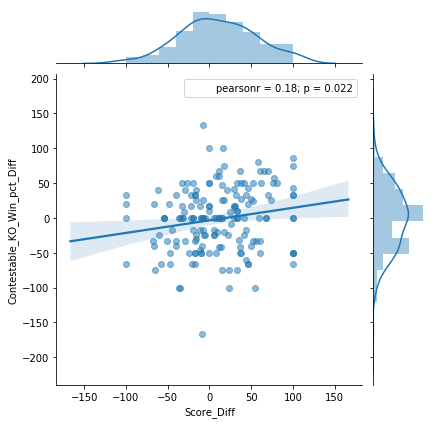

In [79]:
#Plot relationship between Contestable_KO_Win_pct_Diff and Points Scored Diff

j = sns.jointplot(x='Score_Diff', y='Contestable_KO_Win_pct_Diff', data=df, scatter_kws = {'alpha' : 0.5}, kind = 'reg')
j.annotate(stats.pearsonr)
plt.show()

After plotting the relationships between 'Contestable_KO_Win_pct_Diff' and 'Points Scored Diff' and calculating the Pearson's R value, we find that there is a  small, positive relationship between 'Contestable_KO_Win_pct_Diff' and 'Points Scored Diff' (r = 0.18).

Because 'Points Scored Diff' is a proxy for a win or loss, we will use this variable and 'Contestable_KO_Win_pct_Diff' to test the hypothesis that the USA wins matches when they have a positive difference in Contestable Kickoff Win Percentage ('Contestable_KO_Win_pct_Diff').

## Hypothesis

Despite the initial analysis that there is only a very small positive correlation between the USA's Contestable Kickoff Win Percentage Difference and Points Scored Difference, I will test the commonly-held belief that the key to USA 7s winning matches is winning their own kickoffs/restarts.

However, the statement above is a very general statement, and we need a specific measure to test. Specifically, I will test the hypothesis that if the USA outperforms their opponent in Contestable Kickoff Win Percentage (Contestable_KO_Win_pct_Diff > 0), they win the match.

We will using α = .10  as our alpha, because, let's face it - we're not curing cancer here!

**Hypothesis Test**  
H<sub>0</sub>: There is no difference between the proportion of Contestable_KO_Win_pct_Diff in wins and losses (Contestable_KO_Win_pct_Diff_w - Contestable_KO_Win_pct_Diff_l = 0).  
H<sub>1</sub>: There is a difference between the proportion Contestable_KO_Win_pct_Diff in wins and losses (Contestable_KO_Win_pct_Diff_w - Contestable_KO_Win_pct_Diff_l != 0)  
α = .10  

**Start with 'Contestable_KO_Win_pct_Diff' > 0 as hypothesis.**

### Means of USA wins, losses, overall
Get means of KOs for wins and losses


In [129]:
# Create a new column called df.ko_res where the value is 1
# if df.Contestable_KO_Win_pct_Diff is greater than 0 and 0 if not
df['ko_res'] = np.where(df['Contestable_KO_Win_pct_Diff']>0, 1, 0)

In [132]:
len(df)

168

In [164]:
n = len(df)

#USA wins df
#usa_w
#USA losses df
#usa_l

w_ko = usa_w['ko_res']
l_ko = usa_l['ko_res']

# Get counts of each
w_cnt = w_ko.count()
l_cnt = l_ko.count()

# count of successful KO% ('1') in each sample
w_s = sum(usa_w.ko_res)
l_s = sum(usa_l.ko_res)
sum_pos = (w_s + l_s)


print("Sum of Contestable_KO_Win_pct_Diff results > 0 in USA wins: ", w_s)
print("Sum of Contestable_KO_Win_pct_Diff results > 0 in USA losses: ", l_s)
print("Sum of all matches > 0: ", sum_pos)
# print counts
print("Count of matches - USA wins: ", w_cnt)
print("Count of matches - USA losses: ", l_cnt)

Sum of Contestable_KO_Win_pct_Diff results > 0 in USA wins:  43
Sum of Contestable_KO_Win_pct_Diff results > 0 in USA losses:  21
Sum of all matches > 0:  64
Count of matches - USA wins:  91
Count of matches - USA losses:  70


In [139]:
#Calculating the proportions per win/loss group 
prop_l = (sum(usa_l.ko_res))/(len(usa_l.ko_res))
prop_w = (sum(usa_w.ko_res))/(len(usa_w.ko_res))
print(prop_w, prop_l) # p-hats for both wins and losses
print("Proportion of > 0 KO Win Diff in Win sample: ", prop_w)
print("Proportion of > 0 KO Win Diff in Loss sample: ", prop_l)

0.4725274725274725 0.3
Proportion of > 0 KO Win Diff in Win sample:  0.4725274725274725
Proportion of > 0 KO Win Diff in Loss sample:  0.3


In [150]:
# Or, instead of calculating proportions, can just use .mean()
usa_w_mean = usa_w.ko_res.mean()
print("Kickoff Win % Difference in USA Wins: ",usa_w_mean)

Kickoff Win % Difference in USA Wins:  0.4725274725274725


In [151]:
usa_l_mean = usa_l.ko_res.mean()
print("Kickoff Win % Difference in USA Losses: ",usa_l_mean)

Kickoff Win % Difference in USA Losses:  0.3


In [152]:
# Function to calculate ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    # np.arange(1, len(x)+1) / len(x)
    y = np.arange(1, n+1) / n

    return x, y

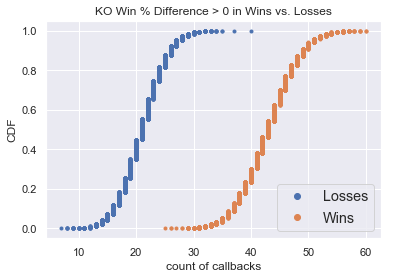

In [153]:
# Plot CDFs of KO Win % Diff > for wins vs. losses
w_samples = np.random.binomial(w_cnt, prop_w, size=10000)
l_samples = np.random.binomial(l_cnt, prop_l, size=10000)

bx, by = ecdf(l_samples)
_ = plt.plot(bx, by, marker='.', linestyle='none')

wx, wy = ecdf(w_samples)
_ = plt.plot(wx, wy, marker='.', linestyle='none')

plt.margins = 0.02

_ = plt.xlabel('count of callbacks')
_ = plt.ylabel('CDF')
_ = plt.title('KO Win % Difference > 0 in Wins vs. Losses')
_ = plt.legend(('Losses', 'Wins'), loc='lower right', fontsize='large', markerscale=2)



## Frequentist approach: Z-test on Diff data

<span style="color:red">Will the z-test only work on Diff data?  Looking for KO Win % Diff > 0?</span>

In [160]:
# Use statsmodels.stats.proportion.proportions_ztest for a test for proportions based on normal (z) test
# https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html#statsmodels.stats.proportion.proportions_ztest
z, p_value = sm.stats.proportions_ztest([w_s, l_s], [w_cnt, l_cnt], alternative='larger')
print("z-score is ",z)
#print("P-value is ",p_value)
print("P-value is ",'{0:0.3f}'.format(p_value))

z-score is  2.2175073099556135
P-value is  0.013


## Revisit how to interpret CIs

In [161]:
# Confidence interval (95%)
# statsmodel confidence interval for z-test for proportion only seems to handle one sample
#prop_diff = prop_w - prop_b
#print("Observed difference in proportions = ", prop_diff)

ci = sm.stats.zconfint(w_ko, l_ko, alpha=0.1, alternative='two-sided', ddof=1.0)
print(ci)

(0.04573331998712188, 0.29932162506782317)


In [163]:
# Confidence interval (95%)
# statsmodel confidence interval for z-test for proportion only seems to handle one sample
prop_diff = prop_w - prop_l
print("Observed difference in proportions = ", prop_diff)

z_crit = 1.96
p_hat1 = prop_w*(1-prop_w)/w_cnt
p_hat2 =  prop_l*(1-prop_l)/l_cnt
ci_high = prop_diff + z_crit*(np.sqrt(p_hat1 + p_hat2))
ci_low = prop_diff - z_crit*(np.sqrt(p_hat1 + p_hat2))

print('95% conf int: \t {} - {}'.format(ci_low, ci_high))
ME = (ci_high - ci_low)/2
print('Margin of err: \t +/-{}'.format(ME))

Observed difference in proportions =  0.17252747252747253
95% conf int: 	 0.024045875942739547 - 0.3210090691122055
Margin of err: 	 +/-0.14848159658473298


### Plot CDFs

In [108]:
# Function to calculate ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    # np.arange(1, len(x)+1) / len(x)
    y = np.arange(1, n+1) / n

    return x, y

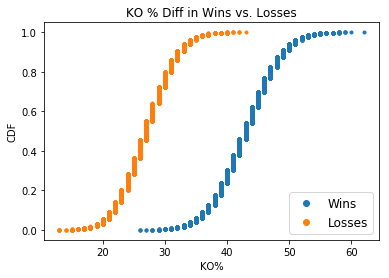

In [74]:
# Plot CDFs of KO Win Pct Diff for USA Wins and Losses/Ties
w_samples = np.random.binomial(w_cnt, w_prop, size=10000)
lt_samples = np.random.binomial(lt_cnt, l_prop, size=10000)

wx, wy = ecdf(w_samples)
_ = plt.plot(wx, wy, marker='.', linestyle='none')

lx, ly = ecdf(lt_samples)
_ = plt.plot(lx, ly, marker='.', linestyle='none')

plt.margins = 0.02

_ = plt.xlabel('KO%')
_ = plt.ylabel('CDF')
_ = plt.title('KO % Diff in Wins vs. Losses')
_ = plt.legend(('Wins', 'Losses'), loc='lower right', fontsize='large', markerscale=2)

## Create Bootstrap Test

In [166]:
# Construct arrays of data: white-sounding names, black-sounding names
all_matches = np.array([True] * int(sum_pos) + [False] * int(n-sum_pos))
size = 10000

#create an empty array of 10,000 bootstrap replicates
bs_reps_diff = np.empty(size)

# create bootstrap replicates and replicates of difference
for i in range(size):
    w_bs_replicates = np.sum(np.random.choice(all_matches, size=w_cnt))
    l_bs_replicates = np.sum(np.random.choice(all_matches, size=l_cnt))
    
    bs_reps_diff[i] = (w_bs_replicates - l_bs_replicates)/l_cnt

bs_p_value = np.sum(bs_reps_diff >= prop_diff) / len(bs_reps_diff)

# calculate 90% CI
bs_ci = np.percentile(bs_reps_diff, [5, 95])
bs_mean_diff = np.mean(bs_reps_diff)


print('obs diff: {}\n'.format(prop_diff))
print('p-value: {}\n90% conf. int.: {}'.format(bs_p_value, bs_ci))

obs diff: 0.17252747252747253

p-value: 0.2283
90% conf. int.: [-0.02857143  0.25714286]


In [167]:
print(np.max(bs_reps_diff))

0.45714285714285713


### UPDATE

The p-value for both the frequentist approach is less than .10, so we can reject the null hypothesis that there is no difference in the proportion/rate of call-backs between the ko win % Diff > 0 in Wins vs. Losses (call_back_rate_w - call_back_rate_b = 0).

The null hypothesis states that (proportion of call-backs for white-sounding names - proportion of call-backs for white-sounding names = 0). Using the frequentist approach, the 95% confidence interval is 1.68% - 4.73%, which is above 0%, so the null hypothesis can be rejected.

### Instructions

At this point, you have obtained the data set for your Capstone project, cleaned and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you have learned to explore the data. For example, are there variables that are particularly significant in terms of explaining the answer to your project question? Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? 

**Submission:** Write a short report (1-2 pages) on the inferential statistics steps you performed and your findings. Check this report into your github and submit a link to it. Eventually, this report can be incorporated into your Milestone report.